<a href="https://colab.research.google.com/github/ravishnirala/CODESOFT/blob/main/CODESOFT_TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 TASK2: MOVIE RATING PREDICTION

      AUTHOR : RAVISH KUMAR
      BATCH : AUGUST A71
      AIM : TO BUILD A MODEL THAT PREDICT  RATING OF MOVIE BASED ON FEATURE LIKE GENRE , DIRECTOR AND ACTOR





In [4]:
# IMPORTING SOME LIBRARY

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
df=pd.read_csv("/content/drive/MyDrive/IMDb Movies India.csv",encoding='latin1')

In [7]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [8]:
#droping null value
df.dropna(inplace=True)

In [9]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [11]:
df.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [12]:
df.shape

(5659, 10)

In [13]:
#checking whethear any null value
df.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [14]:
print("Unique genres:", df['Genre'].unique())

Unique genres: ['Drama' 'Comedy, Romance' 'Comedy, Drama, Musical' 'Drama, Romance, War'
 'Horror, Mystery, Thriller' 'Action, Crime, Thriller' 'Horror'
 'Horror, Romance, Thriller' 'Comedy, Drama, Romance' 'Comedy, Drama'
 'Crime, Drama, Mystery' 'Horror, Thriller' 'Comedy, Horror'
 'Drama, Horror, Mystery' 'Action, Thriller' 'Action'
 'Horror, Mystery, Romance' 'Horror, Mystery' 'Drama, Horror, Romance'
 'Action, Drama, History' 'Action, Drama, War' 'Thriller' 'Comedy'
 'Adventure, Horror, Mystery' 'Action, Sci-Fi' 'Crime, Mystery, Thriller'
 'Drama, History' 'Sport' 'Biography, Drama, History' 'Horror, Romance'
 'Crime, Drama' 'Adventure, Drama' 'Comedy, Mystery, Thriller'
 'Drama, Romance' 'Crime, Thriller' 'Horror, Sci-Fi, Thriller'
 'Drama, Mystery, Thriller' 'Drama, Family, Musical' 'Action, Comedy'
 'Action, Adventure, Fantasy' 'Documentary' 'Drama, Horror, Musical'
 'Action, Biography, Drama' 'Action, Fantasy, Mystery'
 'Adventure, Drama, Mystery' 'Mystery, Thriller' 'Comedy, 

In [15]:
print("Unique directors:", df['Director'].unique())

Unique directors: ['Gaurav Bakshi' 'Ovais Khan' 'Rahul Rawail' ... 'Tariq Bhat'
 'Sumitra Bhave' 'Mozez Singh']


In [16]:
print("Unique actors:", df['Actor 1'].unique())

Unique actors: ['Rasika Dugal' 'Prateik' 'Bobby Deol' ... 'Sadhana Singh'
 'Sunil Sukthankar' 'Darsheel Safary']


In [17]:
print("Unique actors:", df['Actor 2'].unique())

Unique actors: ['Vivek Ghamande' 'Ishita Raj' 'Aishwarya Rai Bachchan' ...
 'Prince Daniel' 'Sarah Jane Dias' 'Jayamalini']


In [18]:
print("Unique actors:", df['Actor 3'].unique())

Unique actors: ['Arvind Jangid' 'Siddhant Kapoor' 'Shammi Kapoor' ... 'Priyanka Mehta'
 'Rajesh Puri' 'Shatakshi Gupta']


In [19]:
# encoding the categorical to numerical
label_encoders = {}
categorical_columns = ['Genre', 'Director', 'Actor 1', 'Actor 2' , 'Actor 3']


for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [20]:
# Displaying the few preprocessing data
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,229,7.0,8,629,1352,2272,319
3,#Yaaram,(2019),110 min,184,4.4,35,1335,1198,719,2148
5,...Aur Pyaar Ho Gaya,(1997),147 min,157,4.7,827,1530,378,75,2045
6,...Yahaan,(2005),142 min,289,7.4,"1,086",2044,692,1112,2524
8,?: A Question Mark,(2012),82 min,320,5.6,326,135,1934,1175,1013


*** Creating featrue and target variable from data ***

In [21]:
features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
target = 'Rating'

X = df[features]
y = df[target]

*Split the data into training and testing sets.*

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
print(X_train)

       Genre  Director  Actor 1  Actor 2  Actor 3
9424     229       719      720     2010     1866
12009    229      1174      393     1900     2166
4316     275       893     1294      176     2452
6897     157      2120     1568     1730     2068
2338     229       302      256      144      845
...      ...       ...      ...      ...      ...
10263    248      1141      525     1388     1113
14280    282      2103     1761     2268      991
14355    354       437     1598     2115       57
14818    142      2002      761     1999     1388
2209     316      1491      373     1852      214

[4527 rows x 5 columns]


In [29]:
print(y_train)

9424     8.0
12009    6.3
4316     7.2
6897     7.3
2338     6.4
        ... 
10263    6.0
14280    5.7
14355    4.1
14818    3.2
2209     4.9
Name: Rating, Length: 4527, dtype: float64


In [23]:
#Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.7472958023928409


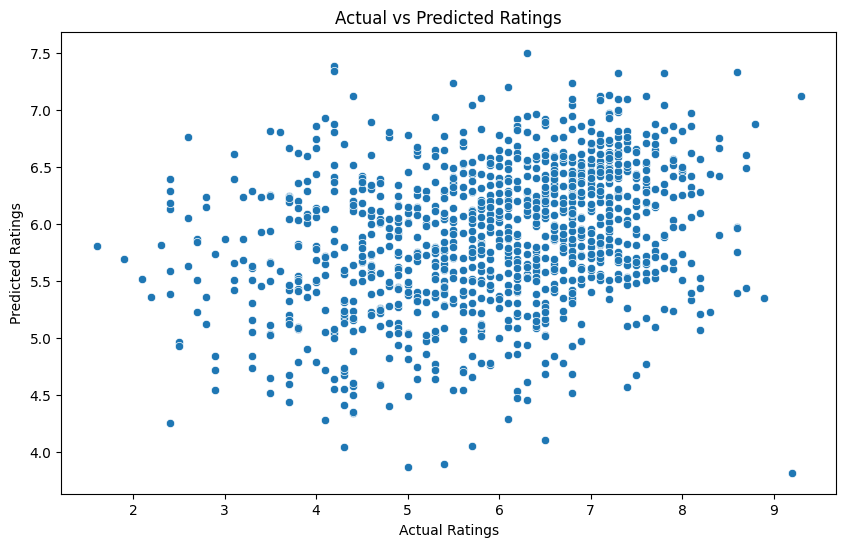

In [24]:
# Plot the predicted vs actual ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()

In [25]:
X_test=np.array([[1,2,3,4,5]])
y_test=model.predict(X_test)
y_test


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5.233])

In [31]:
print(X_train)

       Genre  Director  Actor 1  Actor 2  Actor 3
9424     229       719      720     2010     1866
12009    229      1174      393     1900     2166
4316     275       893     1294      176     2452
6897     157      2120     1568     1730     2068
2338     229       302      256      144      845
...      ...       ...      ...      ...      ...
10263    248      1141      525     1388     1113
14280    282      2103     1761     2268      991
14355    354       437     1598     2115       57
14818    142      2002      761     1999     1388
2209     316      1491      373     1852      214

[4527 rows x 5 columns]


In [26]:
print(y_train)

9424     8.0
12009    6.3
4316     7.2
6897     7.3
2338     6.4
        ... 
10263    6.0
14280    5.7
14355    4.1
14818    3.2
2209     4.9
Name: Rating, Length: 4527, dtype: float64


In [32]:
print(X_test)

[[1 2 3 4 5]]


In [33]:
print(y_test)

[5.233]


In [35]:


# Sample dataset
data = {
    'Actors': ['Actor 1', 'Actor 2', 'Actor 3', 'Actor 1', 'Actor 2', 'Actor 3'],
    'Director': ['Director 1', 'Director 2', 'Director 3', 'Director 1', 'Director 2', 'Director 3'],
    'Genre': ['Action', 'Comedy', 'Drama', 'Action', 'Comedy', 'Drama'],
    'rating': [8.5, 7.2, 6.9, 8.1, 7.5, 7.0]
}
df = pd.DataFrame(data)

# Display the first few rows of the dataset
df.head()

,Actors,Director,Genre,rating
0,Actor 1,Director 1,Action,8.5
1,Actor 2,Director 2,Comedy,7.2
2,Actor 3,Director 3,Drama,6.9
3,Actor 1,Director 1,Action,8.1
4,Actor 2,Director 2,Comedy,7.5


##Conclusion:

*I MODEL BUILD A MODEL THAT PREDICT  RATING OF MOVIE BASED ON FEATURE LIKE GENRE , DIRECTOR AND ACTOR .
I CONCLUDE THAT THE MODEL IS WORKING PERFECTLY ON OTHER GIVEN DATASET .
*